In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

          0         1         2
0  0.528962  0.649895  0.682764
1  0.256894  0.963494  0.757310
          0         1         2
0  0.528962  0.649895  0.682764
1       NaN  0.963494  0.757310


(2, 3)

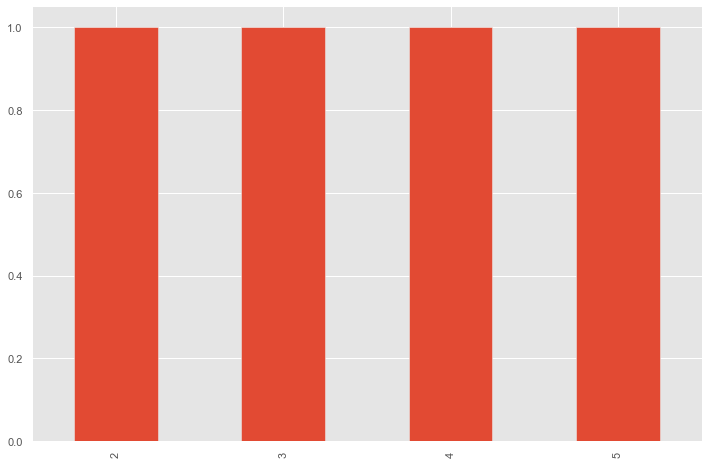

In [2]:
# creating series and dataframes

area_dict = {"California": 1, "Texas": 2, "New York": 3, "Florida": 4, "Illinois": 5}

area = pd.Series(area_dict)

pop_dict = { "California": 38332521, "Texas": 26448193, "New York": 19651127, "Florida": 19552860, "Illinois": 12882135 }

pop = pd.Series(pop_dict)

states = pd.DataFrame({"area": area, "population": pop})

states

# loc fun with dataframes, basically row:column accessor using labels where iloc uses indexes
states.loc[:, ["population", "area"]]

"California" in states.index

"population" in states

states.loc["California", "area"] = 7

states[(states.population >= 12882135) & (states.area >= 5)]

states.loc["Texas":"Illinois", "area"].value_counts().plot(kind="bar")

arr = np.random.rand(2,3)

s = pd.DataFrame(arr)

print(s)
print((s[s > 0.5]))

arr.shape

In [3]:
rng = np.random.RandomState(42)

In [4]:
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [5]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)), columns=["A", "B", "C", "D"])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [6]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [7]:
np.divide(df, 4)

,A,B,C,D
0,1.50,2.25,0.50,1.50
1,1.75,1.00,0.75,1.75
2,1.75,0.50,1.25,1.00


In [8]:
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [9]:
# combining series with column mismatches
area = pd.Series({"Alaska": 1723337, "Texas": 695662, "California": 423967}, name="area")
area
population = pd.Series({"California": 38332521, "Texas": 26448193, "New York": 16951127 }, name="population")
population

California    38332521
Texas         26448193
New York      16951127
Name: population, dtype: int64

In [10]:
area.index.union(population.index)

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [11]:
# so, you can use indexes to merge the series or dataframes together based on index
# and if no matches are found, N/A is filled in --- possibly we can drop those

In [12]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
B + A

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [13]:
A.add(other=B, fill_value=0) # or A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [14]:
# similar alignment happens for dataframes, but for both rows and indices
A = pd.DataFrame(rng.randint(0, 20, (2, 2)), columns=["A", "B"])

In [15]:
A

,A,B
0,1,11
1,5,1


In [16]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)), columns=["B", "A", "C"])
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [17]:
B + A

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [18]:
# this is cool, let's say you want an average value from A, you can stack and then take mean
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


In [19]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [20]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [21]:
df = pd.DataFrame(A, columns=list("QRST"))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [22]:
df.subtract(df["R"], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [23]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int32

In [24]:
df

,Q,R,S,T
0,3,8,2,4
1,2,6,4,8
2,6,1,3,8


In [25]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


In [26]:
A = pd.DataFrame({"A": "hello", "B": "good bye"}, index=[1, 2, 3])
print(A)
B = pd.DataFrame({"B": "good bye", "A": "hello"}, index=[1, 2, 3])
print(B)

       A         B
1  hello  good bye
2  hello  good bye
3  hello  good bye
          B      A
1  good bye  hello
2  good bye  hello
3  good bye  hello


In [27]:
A + B

,A,B
1,hellohello,good byegood bye
2,hellohello,good byegood bye
3,hellohello,good byegood bye


In [28]:
# handlings null and nan values

In [29]:
vals = np.array([1, None, 3, 4])
vals

array([1, None, 3, 4], dtype=object)

In [30]:
for dtype in ['object', 'int']:
    print(dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

object
61.3 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

int
2.05 ms ± 62.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



In [31]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [32]:
vals2.sum() # note how nan turned everything into nan instead of being ignored

nan

In [33]:
np.nansum(vals2)

8.0

In [34]:
vals3 = np.array(["1", "5", "3", "4", np.nan])
vals3.dtype

dtype('<U32')

In [35]:
vals3.sort()
vals3

array(['1', '3', '4', '5', 'nan'], dtype='<U32')

In [36]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [37]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int32

In [38]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

In [39]:
data = pd.Series([1, np.nan, 2, None])

In [40]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [41]:
data[data.notna()]

0    1.0
2    2.0
dtype: float64

In [42]:
data.dropna()

0    1.0
2    2.0
dtype: float64

In [43]:
df = pd.DataFrame([[1, np.nan, 2], [2, 3, 5], [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [44]:
# by deafult dropna drops rows with any nan values
df.dropna()

,0,1,2
1,2.0,3.0,5


In [45]:
df.dropna(axis=1) # or axis='columns'

,2
0,2
1,5
2,6


In [46]:
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [47]:
df[3] = np.nan

In [48]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [49]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [50]:
df.dropna(axis='index', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


In [51]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [52]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [53]:
# this is cool, propagate non na value forward or backward
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [54]:
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [55]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [56]:
# a bit unexpected, it seems like it should be backwards
df.fillna(method='ffill', axis='columns')

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


In [57]:
df.fillna(value=0)

,0,1,2,3
0,1.0,0.0,2,0.0
1,2.0,3.0,5,0.0
2,0.0,4.0,6,0.0


Hierarchical Indexing

Imagine you have state population data, by year, so California 2010, 2011, New Yorl 2010, 2011, etc. How do you store that in pandas

In [58]:
index = [ 
    ("California", 2000), ("California", 2010),
    ("New York", 2000), ("New York", 2010),
    ("Texas", 2000), ("Texas", 2010)
]

populations = [33871648, 37253956, 18976457, 19378102, 20273472, 25145561]

pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20273472
(Texas, 2010)         25145561
dtype: int64

In [59]:
pop[("California", 2010)]

37253956

In [60]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

The better way is to use multi index

In [61]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [62]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20273472
            2010    25145561
dtype: int64

In [63]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [64]:
pop["California"].loc[2010]

37253956

In [65]:
# stacking/unstacking games ... let's see this
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20273472,25145561


In [66]:
pop_df = pd.DataFrame({'total': pop, 'under 18': [
    9267089, 9284094, 4687374, 4318033, 5906301, 6879014
]})
pop_df

total  under 18
California 2000  33871648   9267089
           2010  37253956   9284094
New York   2000  18976457   4687374
           2010  19378102   4318033
Texas      2000  20273472   5906301
           2010  25145561   6879014

Now you can do pandas math with ease:

In [67]:
f_u18 = pop_df["under 18"] / pop_df["total"]
pop_df["u18ratio"] = f_u18

In [68]:
pop_df.unstack()

total           under 18           u18ratio          
                2000      2010     2000     2010      2000      2010
California  33871648  37253956  9267089  9284094  0.273594  0.249211
New York    18976457  19378102  4687374  4318033  0.247010  0.222831
Texas       20273472  25145561  5906301  6879014  0.291331  0.273568

In [69]:
pop_df["total"].loc["California", 2005:2010]

California  2010    37253956
Name: total, dtype: int64

In [70]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20273472
            2010    25145561
dtype: int64

In [71]:
pop["California"]

2000    33871648
2010    37253956
dtype: int64

In [72]:
pop[("California", 2010)] # or
pop["California"][2010] # or
pop["California"].loc[2010] # or

37253956

In [73]:
pop["California"].loc[:2010].iloc[0] - pop["California"].loc[:2010].iloc[-1]

-3382308

In [74]:
pop.loc["California" : "New York"]

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [75]:
pop.loc[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [76]:
pop[pop > 22000000]

California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

Many operations with multiindex will fail if data is unsorted

In [77]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.136607
      2      0.738430
c     1      0.326132
      2      0.750374
b     1      0.217136
      2      0.052571
dtype: float64

In [78]:
data = data.sort_index()

In [79]:
data["a": "b"]

char  int
a     1      0.136607
      2      0.738430
b     1      0.217136
      2      0.052571
dtype: float64

In [80]:
pop.unstack(level = 0)

,California,New York,Texas
2000,33871648,18976457,20273472
2010,37253956,19378102,25145561


In [81]:
pop.unstack(level = 0).loc[:, "California"]

2000    33871648
2010    37253956
Name: California, dtype: int64

In [82]:
pop.unstack(level = 1).loc["California"]

2000    33871648
2010    37253956
Name: California, dtype: int64

In [83]:
pop_flat = pop.reset_index(name='population')
pop_flat

,level_0,level_1,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20273472
5,Texas,2010,25145561


In [84]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20273472
            2010    25145561
dtype: int64

In [85]:
pop.groupby("year").mean()

year
2000    2.437386e+07
2010    2.725921e+07
dtype: float64

# Concat and merge

In [86]:
import pandas as pd
import numpy as np

In [87]:
def make_df(cols, ind):
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [88]:
# refresher on array concat
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [89]:
x = [[1, 2], [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [90]:
ser1 = pd.Series(["A", "B", "C"], index=[1, 2, 3])
ser2 = pd.Series(["D", "E", "F"], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [91]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [92]:
# by default it's row wise, but can be changed
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print(pd.concat([df3, df4], axis='columns'))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


In [93]:
# if index is the same, it's duplicated. Often undesireable behavior, so can be changed with a few approaches

# verify integrity will yell if there is duplicate index
dup_index_df1 = make_df('AB', [0, 1])
dup_index_df2 = make_df('AB', [0, 1])
try:
    pd.concat([dup_index_df1, dup_index_df2], verify_integrity=True)
except ValueError as e:
    print("error:", e)

error: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


In [94]:
# you can ignore the index
pd.concat([dup_index_df1, dup_index_df2], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A0,B0
3,A1,B1


In [95]:
# another option is to specify labels, which will create multi index?
pd.concat([dup_index_df1, dup_index_df2], keys=['x', 'y'])

A   B
x 0  A0  B0
  1  A1  B1
y 0  A0  B0
  1  A1  B1

In [96]:
# concat with joins
# consider some overlapping columns

df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
pd.concat([df5, df6])

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [97]:
# join, only the stuff that does not result in nans
pd.concat([df5, df6], join='inner')

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


In [98]:
# another option tells which columns to preserve
pd.concat([df5, df6]).reindex(columns=df5.columns)

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


In [99]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})

df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'], 
                    'hire_date': [2004, 2008, 2012, 2014]})

In [100]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [101]:
# automatically found the employee common column  to merge ^

# many to one join
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})

print(pd.merge(df3, df4))

  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


In [102]:
# many to many join

df5 = pd.DataFrame({'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux', 'spreadsheets', 'organization']})

print(pd.merge(df1, df5))

  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


In [103]:
# merging on index

df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a);

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [104]:
# if you try to merge it without specifying how, it will fail, it does not auto detect index matches
try:
    pd.merge(df1a, df2a)
except ValueError as e:
    print("failed merge error: ", e)

# you can specify how to merge with the index
print(pd.merge(df1a, df2a, left_index=True, right_index=True))

failed merge error:  No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [105]:
# side trip to see how merge works when you have mismatched index values, or if columns match, etc
tdf1 = make_df('AB', [1, 2, 3]).set_index('A')
tdf2 = make_df('AB', [3, 4]).set_index('A')

print(tdf1); print(tdf2);

print(pd.merge(tdf1, tdf2, left_index=True, right_index=True, how='outer', indicator=True))

     B
A     
A1  B1
A2  B2
A3  B3
     B
A     
A3  B3
A4  B4
    B_x  B_y      _merge
A                       
A1   B1  NaN   left_only
A2   B2  NaN   left_only
A3   B3   B3        both
A4  NaN   B4  right_only


In [106]:
# join is a convenience method that does merge on indeces
print(df1a.join(df2a))

                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [107]:
# you can mix index and column merges
print(df1a)
print(df3)
print(pd.merge(df1a, df3, left_index=True, right_on='employee'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
       group_x employee      group_y  hire_date
0   Accounting      Bob   Accounting       2008
1  Engineering     Jake  Engineering       2012
2  Engineering     Lisa  Engineering       2004
3           HR      Sue           HR       2014


## Join Arithmetic

In [108]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                    columns=['name', 'food'])

df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                    columns=['name', 'drink'])

print(df6); print(df7); print(pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


In [109]:
# outer
print(df6); print(df7); print(pd.merge(df6, df7, how='outer'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


In [110]:
# left
print(df6); print(df7); print(pd.merge(df6, df7, how='left'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


In [111]:
# right
print(df6); print(df7); print(pd.merge(df6, df7, how='right'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
     name   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer


In [112]:
# and now merging with conflicting column names
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})

df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})

print(df8); print(df9); print(pd.merge(df8, df9, on='name'))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [113]:
print(df8); print(df9); print(pd.merge(df8, df9, on='name', suffixes=['_left', '_right']))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_left  rank_right
0   Bob          1           3
1  Jake          2           1
2  Lisa          3           4
3   Sue          4           2


## US States Data example

In [199]:
pop = pd.read_csv('state_population.csv')
areas = pd.read_csv('state_areas.csv')
abbrevs = pd.read_csv('state_abbrevs.csv')

In [200]:
def examine_df(title, df):
    print("examining " + title)

    print("shape: ", df.shape)
    print(df.head())

examine_df('population', pop)
examine_df('areas', areas)
examine_df('abbrevs', abbrevs)

examining population
shape:  (2544, 4)
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
examining areas
shape:  (52, 2)
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
examining abbrevs
shape:  (51, 2)
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [201]:
# rank us states and territories by their 2010 population density

# get data out of pop for year = 2010 and ages = total
pop_2010 = pop[(pop['year'] == 2010) & (pop['ages'] == 'total')]

examine_df('pop_2010', pop_2010)

examining pop_2010
shape:  (53, 4)
    state/region   ages  year  population
3             AL  total  2010   4785570.0
91            AK  total  2010    713868.0
101           AZ  total  2010   6408790.0
189           AR  total  2010   2922280.0
197           CA  total  2010  37333601.0


In [202]:
# found one row that was not needed, it had the whole country
pop_2010.drop(pop_2010[pop_2010['state/region'] == 'USA'].index, inplace=True)

# also let's drop ages and year columns, no longer needed
pop_2010.drop(['ages', 'year'], axis=1, inplace=True)

examine_df('pop_2010', pop_2010)

examining pop_2010
shape:  (52, 2)
    state/region  population
3             AL   4785570.0
91            AK    713868.0
101           AZ   6408790.0
189           AR   2922280.0
197           CA  37333601.0


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [203]:
# we need to bring in area, but first need the names
pop_2010_names = pd.merge(pop_2010, abbrevs, left_on='state/region', right_on = 'abbreviation', how='left')
examine_df('pop_2010_names', pop_2010_names)

examining pop_2010_names
shape:  (52, 4)
  state/region  population       state abbreviation
0           AL   4785570.0     Alabama           AL
1           AK    713868.0      Alaska           AK
2           AZ   6408790.0     Arizona           AZ
3           AR   2922280.0    Arkansas           AR
4           CA  37333601.0  California           CA


In [204]:
# check if we have nulls
pop_2010_names.isna().any()

state/region    False
population      False
state            True
abbreviation     True
dtype: bool

In [205]:
pop_2010_names[pop_2010_names["state"].isna()]

,state/region,population,state,abbreviation
51,PR,3721208.0,NaN,NaN


In [206]:
# fix name by finding row/col using .loc
pop_2010_names.loc[pop_2010_names["state/region"] == "PR", "state"] = "Puerto Rico"
pop_2010_names.loc[pop_2010_names["state/region"] == "PR", "abbreviation"] = "PR"

In [207]:
# now we can bring in area
pop_2010_area = pd.merge(pop_2010_names, areas, how='left')
examine_df('pop_2010_area', pop_2010_area)

examining pop_2010_area
shape:  (52, 5)
  state/region  population       state abbreviation  area (sq. mi)
0           AL   4785570.0     Alabama           AL          52423
1           AK    713868.0      Alaska           AK         656425
2           AZ   6408790.0     Arizona           AZ         114006
3           AR   2922280.0    Arkansas           AR          53182
4           CA  37333601.0  California           CA         163707


In [209]:
pop_2010_area.isna().any()

state/region     False
population       False
state            False
abbreviation     False
area (sq. mi)    False
dtype: bool

In [210]:
# let's clean it up
pop_2010_area.drop(['state/region'], axis=1, inplace=True)

In [211]:
examine_df('pop_2010_area', pop_2010_area)

examining pop_2010_area
shape:  (52, 4)
   population       state abbreviation  area (sq. mi)
0   4785570.0     Alabama           AL          52423
1    713868.0      Alaska           AK         656425
2   6408790.0     Arizona           AZ         114006
3   2922280.0    Arkansas           AR          53182
4  37333601.0  California           CA         163707


In [212]:
pop_2010_area.set_index('state', inplace=True)

In [213]:
examine_df('pop_2010_area', pop_2010_area)

examining pop_2010_area
shape:  (52, 3)
            population abbreviation  area (sq. mi)
state                                             
Alabama      4785570.0           AL          52423
Alaska        713868.0           AK         656425
Arizona      6408790.0           AZ         114006
Arkansas     2922280.0           AR          53182
California  37333601.0           CA         163707


In [217]:
density = pop_2010_area["population"] / pop_2010_area["area (sq. mi)"]
examine_df('density', density)

examining density
shape:  (52,)
state
Alabama        91.287603
Alaska          1.087509
Arizona        56.214497
Arkansas       54.948667
California    228.051342
dtype: float64


In [218]:
density.sort_values(ascending=False, inplace=True)
examine_df('density', density)

examining density
shape:  (52,)
state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64


In [219]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64